In [41]:
# Lab settings - please ingnore
options(repr.plot.width=7, repr.plot.height=4, repr.plot.res=250 ) # Make plots a resonable size

<div class="big_title">LAB 10: Mapping and geospatial analysis: Part 2</div>

BIO3782: Biologist's Toolkit (Dalhousie University)

----------------------------------------

# Setup of workspace

<span class="important"></span> Make sure all required files are in the working directory:

* Create a **folder** on the "Desktop" and name it <span class='file'>Lab10</span>.
* Create a sub folder called <span class='file'>raw_data</span>.
* From Brightspace, download the following files into your folder <span class='file'>Desktop\Lab10\</span> folder:
   * <span class="file">NEON-DS-Site-Layout-Files</span> Folder
   * <span class="file">NEON-DS-Airborne-Remote-Sensing</span> Folder
   
* In RStudio, change the "working directory" to: <span class='file'>Desktop\Lab10</span>. Click here if you need a [refresher on the **working directory**](https://diego-ibarra.github.io/biol3782/week1/index.html#RStudio's-%22Working-Directory%22)

* In RStudio, create a new R script, name it <span class='file'>lab10.r</span> and make sure you save it in <span class='file'>Desktop\Lab9</span>. You will be writting and copy-pasting code to your <span class='file'>lab9.r</span> file so that you can keep a record of all you did in this lab.

As in previous labs, we'll try simulate "real-life" coding, by using the tags below to indicate when to use RStudio's <span class="editor"></span> or <span class="console"></span>

<br>
<div class="use_editor"></div>    
<br>
<br>
<div class="use_console"></div>    
<br> 

<span class="important"></span> Make sure you check your data, using both summaries (i.e. str(), dim()) and raw data, when you import/load it **and** after any manipulation.

----------------------------------


We will be moving from working with raster data to working with vector data.

# What is Vector data?

Vector data provide a way to represent real world features within the GIS environment. A feature is anything you can see on the landscape. Imagine you are standing on the top of a hill. Looking down you can see houses, roads, trees, rivers, and so on. Each one of these things would be a feature when we represent them in a GIS Application.

Vector data is comprised of lines or arcs, defined by beginning and end points, which meet at nodes. The locations of these nodes and the topological structure are usually stored explicitly. Features are defined by their boundaries only and curved lines are represented as a series of connecting arcs. Vector storage involves the storage of explicit topology, which raises overheads, however it only stores those points which define a feature and all space outside these features is 'non-existent'.

A vector feature has its shape represented using geometry. The geometry is made up of one or more interconnected vertices. A vertex describes a position in space using an X, Y and optionally z axis. Vector representation can be in one of the following formats:

* co-ordinate
Pairs of numbers expressing horizontal distances along orthogonal axes, or triplets of numbers measuring horizontal and vertical distances, or n-numbers along n-axes expressing a precise location in n-dimensional space. Co-ordinates generally represent locations on the earth's surface relative to other locations.

* point
A zero-dimensional abstraction of an object represented by a single X,Y co-ordinate. A point normally represents a geographic feature too small to be displayed as a line or area; for example, the location of a building location on a small-scale map, or the location of a service cover on a medium scale map.
<br>
<img src="point_feature.png">
<br>
* line
A set of ordered co-ordinates that represent the shape of geographic features too narrow to be displayed as an area at the given scale (contours, street centrelines, or streams), or linear features with no area (county boundary lines). A lines is synonymous with an arc.
<br>
<img src="polyline_feature.png">
<br>
* polygon
A feature used to represent areas. A polygon is defined by the lines that make up its boundary and a point inside its boundary for identification. Polygons have attributes that describe the geographic feature they represent.
<br>
<img src="polygon_feature.png">
<br>

Now,we will open and plot point, line and polygon vector data stored in shapefile format in R

# Import Shapefiles

We will use the `sf` package to work with vector data in R. We will also use the `raster` package so we can explore raster and vector spatial metadata using similar commands. Let's install and load the required packages.

<br>
<div class="use_console"></div>    
<br>

In [121]:
install.packages('sf')
install.packages('geojsonio')

library('sf')
library('geojsonio')
library(ggplot2)
library(dplyr)
library(raster)

Warning message:
"package 'sf' is in use and will not be installed"
Warning message:
"package 'geojsonio' is in use and will not be installed"


The shapefiles that we will import are:

1. A polygon shapefile representing our field site boundary,
1. A line shapefile representing roads, and
1. A point shapefile representing the location of the Fisher flux tower located at the NEON Harvard Forest field site.

The first shapefile that we will open contains the boundary of our study area (Area Of Interest or AOI). To import shapefiles we use the sf function `st_read()`. `st_read()` requires the file path to the shapefile.

Let’s import our AOI:


<br>
<div class="use_editor"></div>    
<br>

In [5]:
aoi_boundary_HARV <- st_read(
  "raw_data/NEON-DS-Site-Layout-Files/HARV/HarClip_UTMZ18.shp")


Reading layer `HarClip_UTMZ18' from data source `C:\Users\flyin\Documents\Biol3782\biol3782\Week 10\raw_data\NEON-DS-Site-Layout-Files\HARV\HarClip_UTMZ18.shp' using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 1 field
geometry type:  POLYGON
dimension:      XY
bbox:           xmin: 732128 ymin: 4713209 xmax: 732251.1 ymax: 4713359
projected CRS:  WGS 84 / UTM zone 18N


# Shapefile Metadata & Attributes

When we import the `HarClip_UTMZ18 shapefile` layer into R, the `st_read()` function automatically stores information about the data. We are particularly interested in the geospatial metadata, describing the format, CRS, extent, and other components of the vector data, and the attributes which describe properties associated with each individual vector object.

# Spatial Metadata

Key metadata for all shapefiles include:

* Object Type: the class of the imported object.
* Coordinate Reference System (CRS): the projection of the data.
* Extent: the spatial extent (i.e. geographic area that the shapefile covers) of the shapefile. Note that the spatial extent for a shapefile represents the combined extent for all spatial objects in the shapefile.

We can view shapefile metadata using the `st_geometry_type()`, `st_crs()`, and `st_bbox()` functions. First, let’s view the geometry type for our AOI shapefile:

<br>
<div class="use_console"></div>    
<br>

In [6]:
st_geometry_type(aoi_boundary_HARV)

[1] POLYGON
18 Levels: GEOMETRY POINT LINESTRING POLYGON MULTIPOINT ... TRIANGLE

`aoi_boundary_HARV` is a polygon object. The 18 levels shown list the possible categories of the geometry type. 

Now let’s check what CRS this file data is in:

<br>
<div class="use_console"></div>    
<br>

In [7]:
st_crs(aoi_boundary_HARV)

Coordinate Reference System:
  User input: WGS 84 / UTM zone 18N 
  wkt:
PROJCRS["WGS 84 / UTM zone 18N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 18N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-75,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False

Our data is in **CRS UTM zone 18N**. The CRS is critical to interpreting the object’s extent values as it specifies units. To find the extent of our AOI, we can use the `st_bbox()` function.

<br>
<div class="use_console"></div>

In [8]:
st_bbox(aoi_boundary_HARV)

     xmin      ymin      xmax      ymax 
 732128.0 4713208.7  732251.1 4713359.2 

<div class="Q"><br><br>

What do spatial extents represent? 
 
<br><br><div class="qhelp"></div></div>

We can also view all of the metadata and attributes for this shapefile object by printing it to the screen.

<br>
<div class="use_console"></div>

In [13]:
aoi_boundary_HARV

id,geometry
<dbl>,<POLYGON [m]>
1,"POLYGON ((732128 4713359, 7..."


# Plotting a Shape file

Let’s visualize the data in our `sf` object using the `ggplot` package. Unlike with raster data, we do not need to convert vector data to a dataframe before plotting with ggplot.

We’re going to customize our boundary plot by setting the size, color, and fill for our plot. When plotting `sf` objects with `ggplot2`, you need to use the `coord_sf()` coordinate system.

<br>
<div class="use_editor"></div>

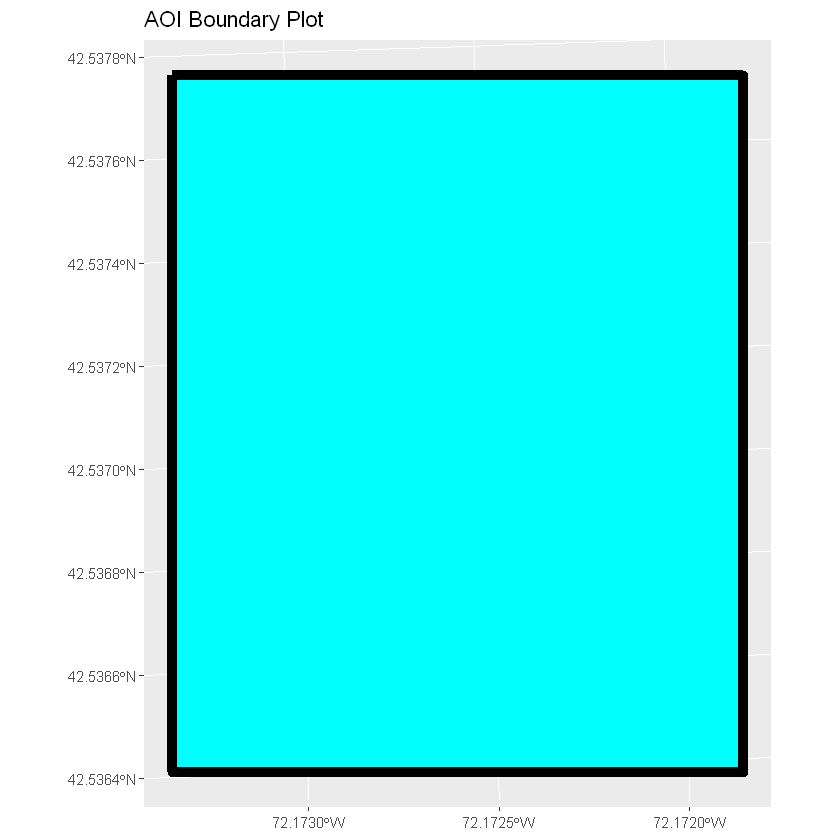

In [16]:
ggplot() + 
  geom_sf(data = aoi_boundary_HARV, size = 3, color = "black", fill = "cyan1") + 
  ggtitle("AOI Boundary Plot") + 
  coord_sf()

<br><br><br>
<div class="startTASK"></div>

Using the steps above, import the <b>HARV_roads</b> and <b>HARVtower_UTM18N</b> layers into R. Assign the object names as follows:
<br>
<b>HARV_roads</b> = <b>lines_HARV</b> 
<br>
<b>HARVtower_UTM18N</b> = <b>point_HARV</b>
<br>
Answer the following questions in Brightspace.

<div class="endTASK"></div>
<br><br><br>

<div class="Q"><br><br>

What type of R spatial object is created when you import each layer? 
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What is the xmin for <b>lines_HARV</b>? 
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What is the ymin for <b>point_HARV</b>? 
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

Does <b>point_HARV</b> contain lines, points or polygons? 
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

Does <b>lines_HARV</b> contain lines, points or polygons? 
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many spatial objectas are in <b>point_HARV</b>? 
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many spatial objectas are in <b>lines_HARV</b>? 
 
<br><br><div class="qhelp"></div></div>

In [18]:
# for task 1

#import data
lines_HARV <- st_read("raw_data/NEON-DS-Site-Layout-Files/HARV/HARV_roads.shp")
point_HARV <- st_read("raw_data/NEON-DS-Site-Layout-Files/HARV/HARVtower_UTM18N.shp")

#Check class
class(lines_HARV)
class(point_HARV)

#CRS and extent of each object
st_crs(lines_HARV)
st_crs(point_HARV)

st_bbox(lines_HARV)
st_bbox(point_HARV)


Reading layer `HARV_roads' from data source `C:\Users\flyin\Documents\Biol3782\biol3782\Week 10\raw_data\NEON-DS-Site-Layout-Files\HARV\HARV_roads.shp' using driver `ESRI Shapefile'
Simple feature collection with 13 features and 15 fields
geometry type:  MULTILINESTRING
dimension:      XY
bbox:           xmin: 730741.2 ymin: 4711942 xmax: 733295.5 ymax: 4714260
projected CRS:  WGS 84 / UTM zone 18N
Reading layer `HARVtower_UTM18N' from data source `C:\Users\flyin\Documents\Biol3782\biol3782\Week 10\raw_data\NEON-DS-Site-Layout-Files\HARV\HARVtower_UTM18N.shp' using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 14 fields
geometry type:  POINT
dimension:      XY
bbox:           xmin: 732183.2 ymin: 4713265 xmax: 732183.2 ymax: 4713265
projected CRS:  WGS 84 / UTM zone 18N


[1] "sf"         "data.frame"

[1] "sf"         "data.frame"

Coordinate Reference System:
  User input: WGS 84 / UTM zone 18N 
  wkt:
PROJCRS["WGS 84 / UTM zone 18N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 18N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-75,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False

Coordinate Reference System:
  User input: WGS 84 / UTM zone 18N 
  wkt:
PROJCRS["WGS 84 / UTM zone 18N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 18N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-75,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False

     xmin      ymin      xmax      ymax 
 730741.2 4711942.0  733295.5 4714260.0 

     xmin      ymin      xmax      ymax 
 732183.2 4713265.0  732183.2 4713265.0 

# Query Vector Feature Metadata

We started to explore our `point_HARV` object in the previous episode. To see a summary of all of the metadata associated with our `point_HARV` object, we can view the object with `View(point_HARV)` or print a summary of the object itself to the console.

<br>
<div class="use_console"></div>

In [19]:
point_HARV

Un_ID,Domain,DomainName,SiteName,Type,Sub_Type,Lat,Long,Zone,Easting,Northing,Ownership,County,annotation,geometry
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<POINT [m]>
A,1,Northeast,Harvard Forest,Core,Advanced Tower,42.5369,-72.17266,18,732183.2,4713265,"Harvard University, LTER",Worcester,C1,POINT (732183.2 4713265)


We can use the `ncol` function to count the number of attributes associated with a spatial object too. 

<span class="note"></span> The geometry is just another column and counts towards the total, resulting in 16 columns instead of 15 (as above).

<br>
<div class="use_console"></div>

In [20]:
ncol(lines_HARV)

[1] 16

We can view the individual name of each attribute using the `names()` function in R

<br>
<div class="use_console"></div>

In [21]:
names(lines_HARV)

[1] "OBJECTID_1" "OBJECTID"   "TYPE"       "NOTES"      "MISCNOTES" 
 [6] "RULEID"     "MAPLABEL"   "SHAPE_LENG" "LABEL"      "BIKEHORSE" 
[11] "RESVEHICLE" "RECMAP"     "Shape_Le_1" "ResVehic_1" "BicyclesHo"
[16] "geometry"

The `head()` function is also useful for getting a preview of the data.

<br>
<div class="use_console"></div>

In [22]:
head(lines_HARV)

,OBJECTID_1,OBJECTID,TYPE,NOTES,MISCNOTES,RULEID,MAPLABEL,SHAPE_LENG,LABEL,BIKEHORSE,RESVEHICLE,RECMAP,Shape_Le_1,ResVehic_1,BicyclesHo,geometry
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<MULTILINESTRING [m]>
1,14,48,woods road,Locust Opening Rd,NA,5,Locust Opening Rd,1297.35706,Locust Opening Rd,Y,R1,Y,1297.10617,R1 - All Research Vehicles Allowed,Bicycles and Horses Allowed,MULTILINESTRING ((730819.2 ...
2,40,91,footpath,NA,NA,6,NA,146.29984,NA,Y,R1,Y,146.29983,R1 - All Research Vehicles Allowed,Bicycles and Horses Allowed,MULTILINESTRING ((732040.2 ...
3,41,106,footpath,NA,NA,6,NA,676.71804,NA,Y,R2,Y,676.71807,R2 - 4WD/High Clearance Vehicles Only,Bicycles and Horses Allowed,MULTILINESTRING ((732057 47...
4,211,279,stone wall,NA,NA,1,NA,231.78957,NA,NA,NA,NA,231.78962,NA,NA,MULTILINESTRING ((731903.6 ...
5,212,280,stone wall,NA,NA,1,NA,45.50864,NA,NA,NA,NA,45.50859,NA,NA,MULTILINESTRING ((732039.1 ...
6,213,281,stone wall,NA,NA,1,NA,198.39043,NA,NA,NA,NA,198.39041,NA,NA,MULTILINESTRING ((732056.2 ...


<div class="Q"><br><br>

How many attributes does <b>point_HARV</b> have? 
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

Who owns the site in the <b>point_HARV</b> object? 
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

Which of the following is not an attribute of the <b>point_HARV</b> object? 
<br><br>
Latitude
<br>
County
<br>
Country
 
<br><br><div class="qhelp"></div></div>

# Explore Values within One Attribute

We can explore individual values stored within a particular attribute. Comparing attributes to a spreadsheet or a data frame, this is similar to exploring values in a column. For spatial objects, we can use the syntax `objectName$attributeName`.

For example, we can see the contents of the TYPE field of our lines feature.

<br>
<div class="use_console"></div>

In [23]:
lines_HARV$TYPE

[1] "woods road" "footpath"   "footpath"   "stone wall" "stone wall"
 [6] "stone wall" "stone wall" "stone wall" "stone wall" "boardwalk" 
[11] "woods road" "woods road" "woods road"

To see only unique values within the TYPE field, we can use the `levels()` function for extracting the possible values of a categorical variable. 

<br>
<div class="use_console"></div>

In [24]:
levels(lines_HARV$TYPE)

NULL

We can also apply functions from `dplyr` to select a subset of features from a spatial object in R, just like with data frames.

For example, we might be interested only in features that are of TYPE “footpath”. Once we subset out this data, we can use it as input to other code so that code only operates on the footpath lines.


<br>
<div class="use_editor"></div>

In [44]:
footpath_HARV <- lines_HARV %>%
  filter(TYPE == "footpath")

nrow(footpath_HARV)

[1] 2

Our subsetting operation reduces the features count to 2. This means that only two feature lines in our spatial object have the attribute TYPE == footpath. Let's take a look at what that means graphically.

<br>
<div class="use_editor"></div>

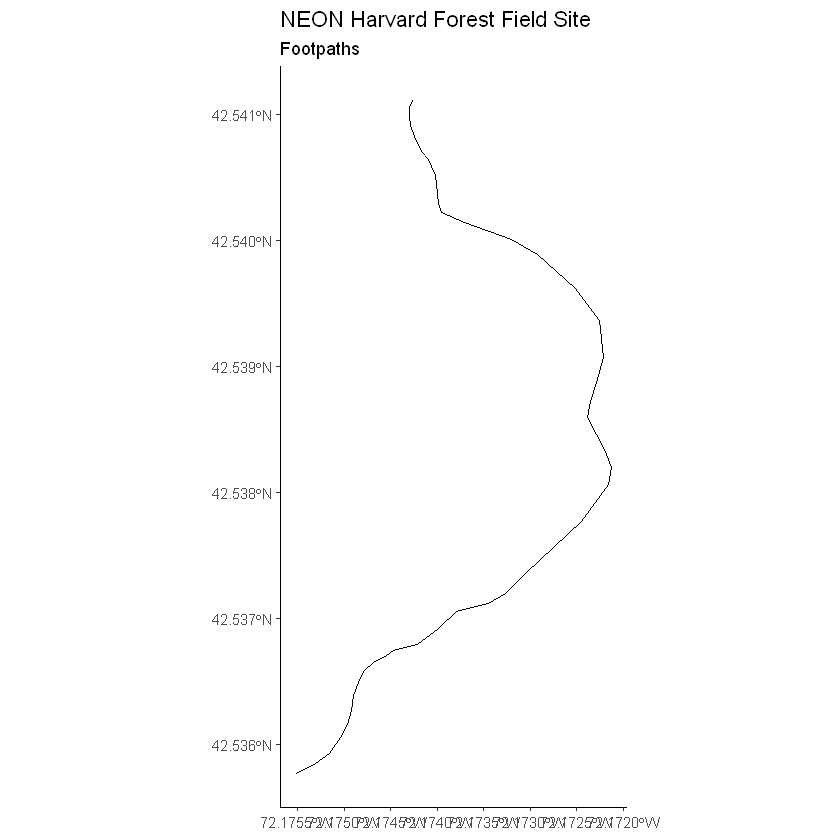

In [47]:
ggplot() + 
  geom_sf(data = footpath_HARV) +
  ggtitle("NEON Harvard Forest Field Site", subtitle = "Footpaths") + 
  coord_sf()+
  theme_classic()

We know that there are two features in our footpaths subset but our plot only shows one feature. Let’s adjust the colors used in our plot. If we have 2 features in our vector object, we can plot each using a unique color by assigning a column name to the color aesthetic. 


<br>
<div class="use_editor"></div>

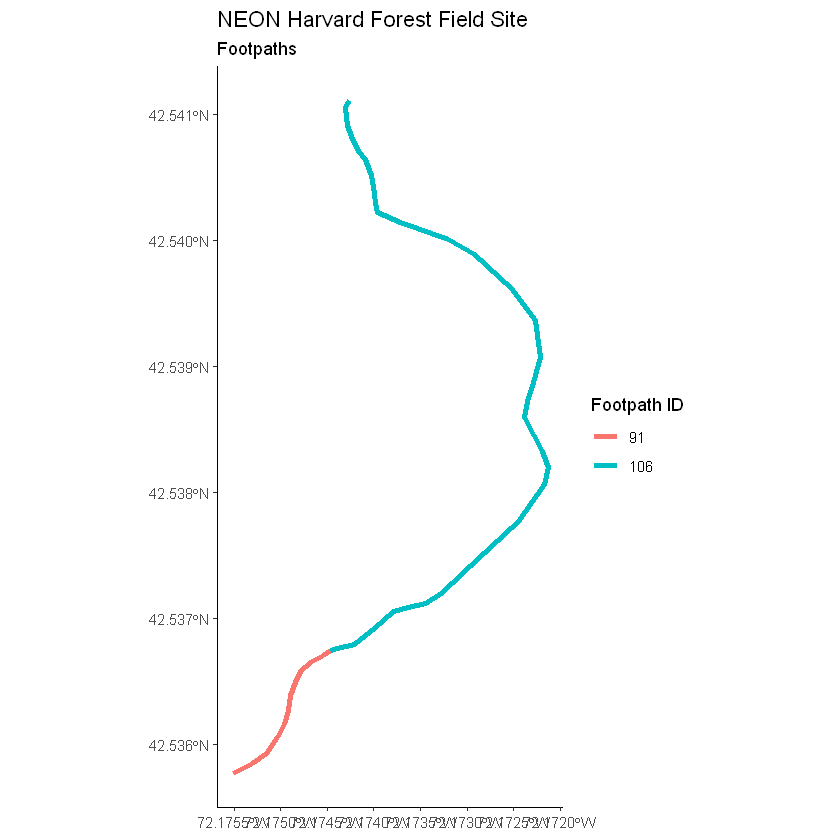

In [48]:
ggplot() + 
  geom_sf(data = footpath_HARV, aes(color = factor(OBJECTID)), size = 1.5) +
  labs(color = 'Footpath ID') +
  ggtitle("NEON Harvard Forest Field Site", subtitle = "Footpaths") + 
  coord_sf()+
  theme_classic()

<div class="Q"><br><br>

How many features are there in TYPE == "boardwalk"? 

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many features are there in TYPE == "stone wall"? 

<br><br><div class="qhelp"></div></div>

Sometimes, changing some of the ggplot aesthetic features can communicate our data better. Let's play around with the dataset by applying a unique color scheme for each road type.


<div class="Q"><br><br>

What type of variable is <b>TYPE</b>? 

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What happens when you use the <b>levels</b> function on a character vector? 

<br><br><div class="qhelp"></div></div>

First, let's see how many road types there are in the data.  We will have to coerce `TYPE` into a factor.

<br>
<div class="use_console"></div>

In [50]:
levels(lines_HARV$TYPE  %>% as.factor())

[1] "boardwalk"  "footpath"   "stone wall" "woods road"

Let's pick four colors, one for each level in our vector object then plot the data


<br>
<div class="use_editor"></div>

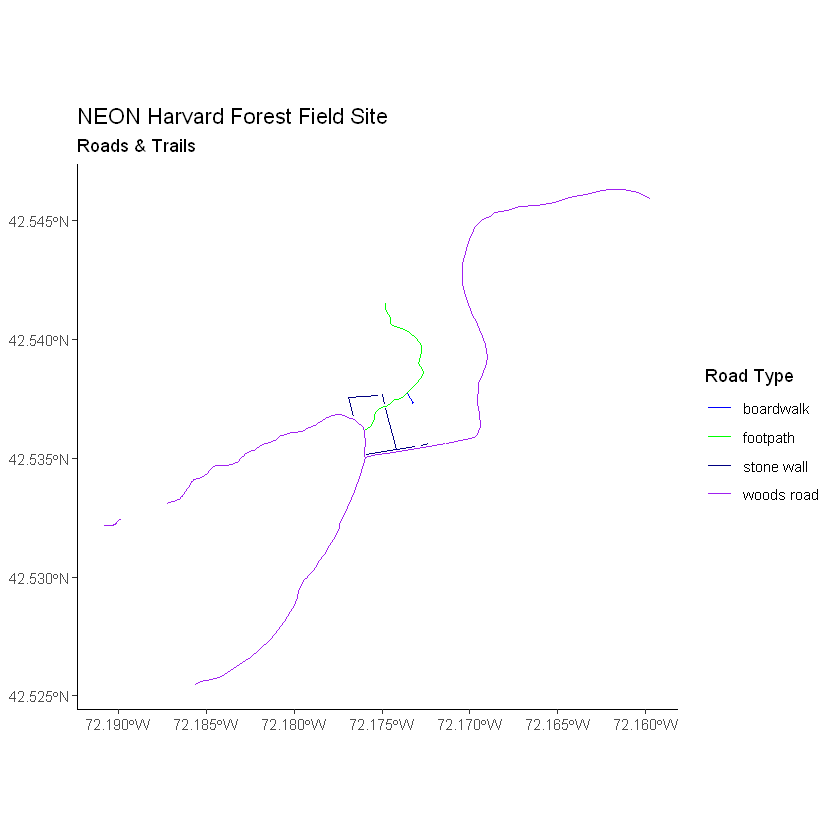

In [52]:
road_colors <- c("blue", "green", "navy", "purple")

ggplot() +
  geom_sf(data = lines_HARV, aes(color = TYPE)) + 
  scale_color_manual(values = road_colors) +
  labs(color = 'Road Type') +
  ggtitle("NEON Harvard Forest Field Site", subtitle = "Roads & Trails") + 
  coord_sf()+
  theme_classic()

<div class="Q"><br><br>

Can spatial object be manipulated using the same functions as a dataframe?
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What function allows ggplot to plot spatial objects directly?
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

TRUE or FALSE: Shape files contain data on extents
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

TRUE or FALSE: Shape files <b>DO NOT</b> contain CRS data.
 
<br><br><div class="qhelp"></div></div>

# Plotting Multiple Shapefiles

Now, let’s create a plot that combines our tower location (`point_HARV`), site boundary (`aoi_boundary_HARV`) and roads (`lines_HARV`) spatial objects. We will need to build a custom legend as well.

To begin, we will create a plot with the site boundary as the first layer. Then layer the tower location and road data on top using `+`.


<br>
<div class="use_editor"></div>

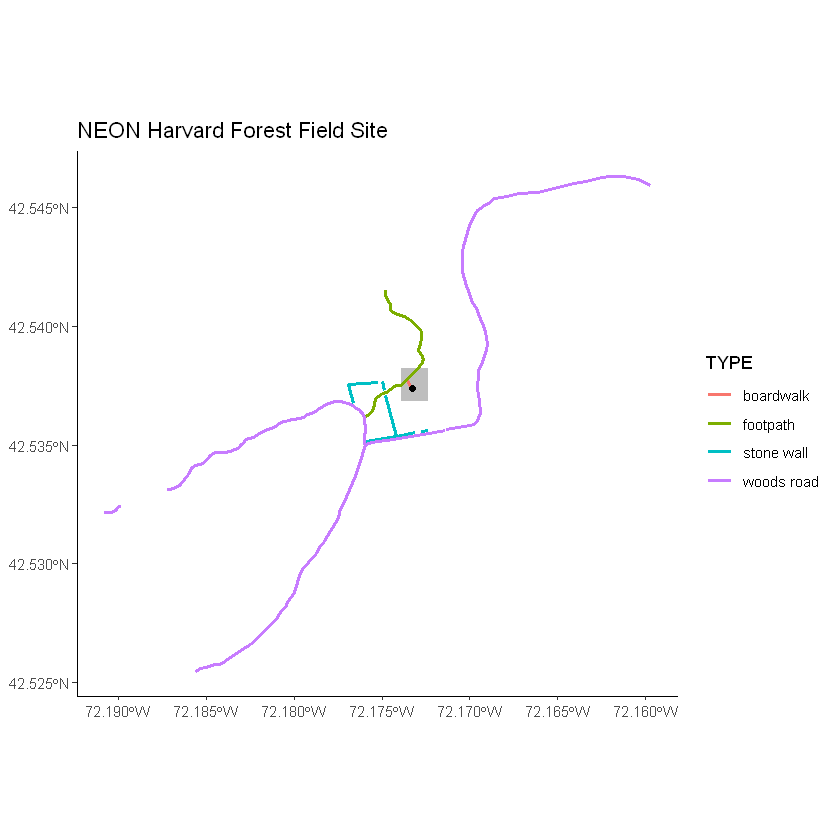

In [53]:
ggplot() + 
  geom_sf(data = aoi_boundary_HARV, fill = "grey", color = "grey") +
  geom_sf(data = lines_HARV, aes(color = TYPE), size = 1) +
  geom_sf(data = point_HARV) +
  ggtitle("NEON Harvard Forest Field Site") + 
  coord_sf()+
  theme_classic()

Next, let’s build a custom legend using the symbology (the colors and symbols) that we used to create the plot above. For example, it might be good if the lines were symbolized as lines. If you want the legend to draw lines or points, you need to add an instruction to the `geom_sf` call - in this case, `show.legend = 'line'`.

<br>
<div class="use_editor"></div>

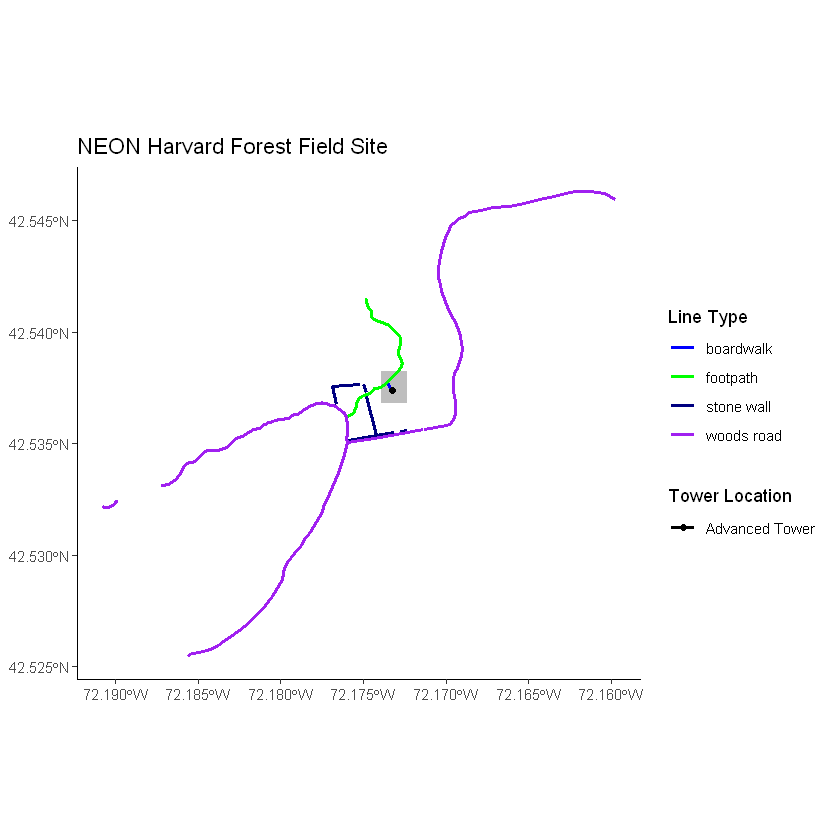

In [55]:
ggplot() + 
  geom_sf(data = aoi_boundary_HARV, fill = "grey", color = "grey") +
  geom_sf(data = lines_HARV, aes(color = TYPE),
          show.legend = "line", size = 1) +
  geom_sf(data = point_HARV, aes(fill = Sub_Type), color = "black") +
  scale_color_manual(values = road_colors, name = "Line Type") + 
  scale_fill_manual(values = "black", name = "Tower Location") +
  ggtitle("NEON Harvard Forest Field Site") + 
  coord_sf()+
  theme_classic()

# Plotting Raster and Vector Data together

We can plot vector data layered on top of raster data using the `+` to add a layer in ggplot. We will create a plot that uses the NEON AOI Canopy Height Model `CHM_HARV_df` as a base layer.

First let's load up the HARV data from NEON-DS-Airborne-Remote-Sensing files and re-create the `CHM_HARV_df` we used in the previous lab.

<br>
<div class="use_editor"></div>

In [108]:
library(raster)

DSM_HARV <- raster("raw_data/NEON-DS-Airborne-Remote-Sensing/HARV/DSM/HARV_dsmCrop.tif") 

DTM_HARV <- raster("raw_data/NEON-DS-Airborne-Remote-Sensing/HARV/DTM/HARV_dtmCrop.tif")

CHM_HARV <- DSM_HARV - DTM_HARV 

CHM_HARV_df <- as.data.frame(CHM_HARV, xy = TRUE) 

Next, let's plot all the data together staring with `CHM_HARV_df`.

<br>
<div class="use_editor"></div>

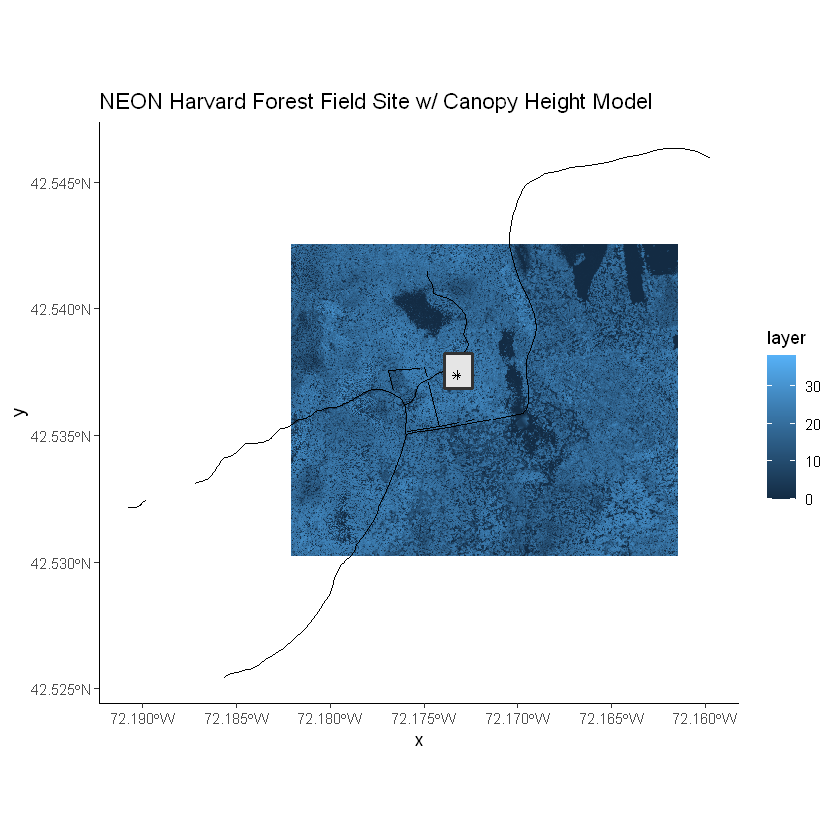

In [109]:
ggplot() +
  geom_raster(data = CHM_HARV_df, aes(x = x, y = y, fill =layer)) +
  geom_sf(data = lines_HARV, color = "black") +
  geom_sf(data = aoi_boundary_HARV, color = "grey20", size = 1) +
  geom_sf(data = point_HARV, pch = 8) +
  ggtitle("NEON Harvard Forest Field Site w/ Canopy Height Model") + 
  coord_sf()+
  theme_classic()

<div class="Q"><br><br>

What operator can add multiple layers to ggplot?
 
<br><br><div class="qhelp"></div></div>

# Working With Spatial Data From Different Sources

We often need to gather spatial datasets from different sources and/or data that cover different spatial extents. These data are often in different Coordinate Reference Systems (CRSs).

Some reasons for data being in different CRSs include:

1. The data are stored in a particular CRS convention used by the data provider (for example, a government agency).
1. The data are stored in a particular CRS that is customized to a region. For instance, many states in the US prefer to use a State Plane projection customized for that state.

<br>
<img src="map_usa_different_projections.jpg">
<br>

Notice the differences in shape associated with each different projection. These differences are a direct result of the calculations used to “flatten” the data onto a 2-dimensional map. Often data are stored purposefully in a particular projection that optimizes the relative shape and size of surrounding geographic boundaries (states, counties, countries, etc).

We will use the `st_read()` function to import the `/US-Boundary-Layers/US-State-Boundaries-Census-2014` layer into R. This layer contains the boundaries of all contiguous states in the U.S. Please note that these data have been modified and reprojected from the original data downloaded from the Census website.

<br>
<div class="use_editor"></div>

In [69]:
state_boundary_US <- st_read("raw_data/NEON-DS-Site-Layout-Files/US-Boundary-Layers/US-State-Boundaries-Census-2014.shp")

Reading layer `US-State-Boundaries-Census-2014' from data source `C:\Users\flyin\Documents\Biol3782\biol3782\Week 10\raw_data\NEON-DS-Site-Layout-Files\US-Boundary-Layers\US-State-Boundaries-Census-2014.shp' using driver `ESRI Shapefile'
Simple feature collection with 58 features and 10 fields
geometry type:  MULTIPOLYGON
dimension:      XYZ
bbox:           xmin: -124.7258 ymin: 24.49813 xmax: -66.9499 ymax: 49.38436
z_range:        zmin: 0 zmax: 0
geographic CRS: WGS 84


Let's take a look at these values in a plot.

<br>
<div class="use_editor"></div>

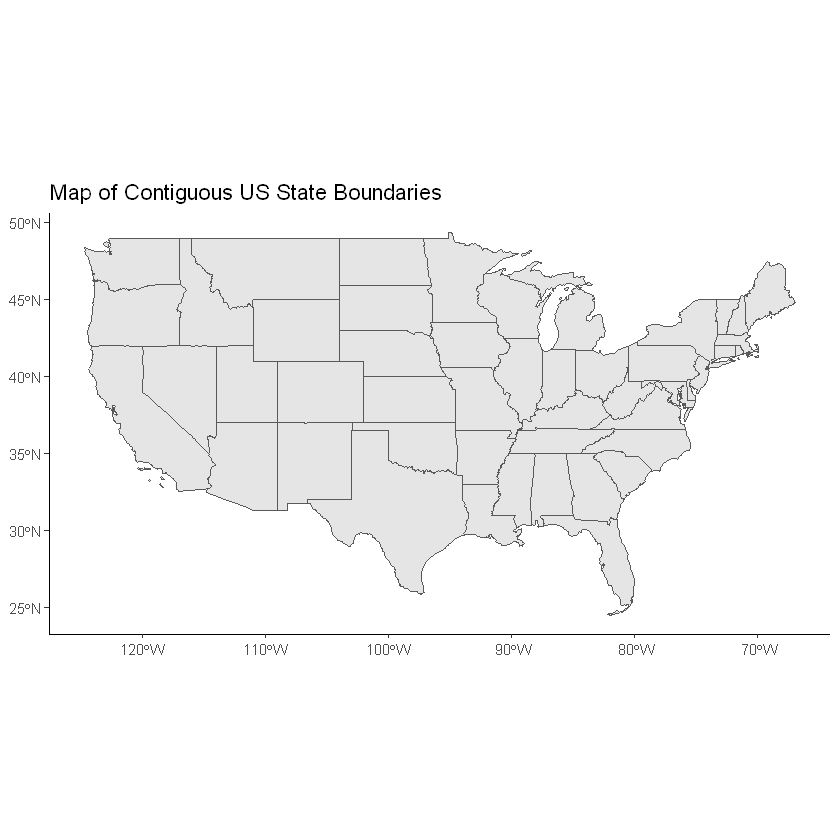

In [70]:
ggplot() +
  geom_sf(data = state_boundary_US) +
  ggtitle("Map of Contiguous US State Boundaries") +
  coord_sf()+
  theme_classic()

We can add a boundary layer of the United States to our map - to make it look nicer. We will import `NEON-DS-Site-Layout-Files/US-Boundary-Layers/US-Boundary-Dissolved-States` and re-create the previous plot.

<br>
<div class="use_editor"></div>

Reading layer `US-Boundary-Dissolved-States' from data source `C:\Users\flyin\Documents\Biol3782\biol3782\Week 10\raw_data\NEON-DS-Site-Layout-Files\US-Boundary-Layers\US-Boundary-Dissolved-States.shp' using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 9 fields
geometry type:  MULTIPOLYGON
dimension:      XYZ
bbox:           xmin: -124.7258 ymin: 24.49813 xmax: -66.9499 ymax: 49.38436
z_range:        zmin: 0 zmax: 0
geographic CRS: WGS 84


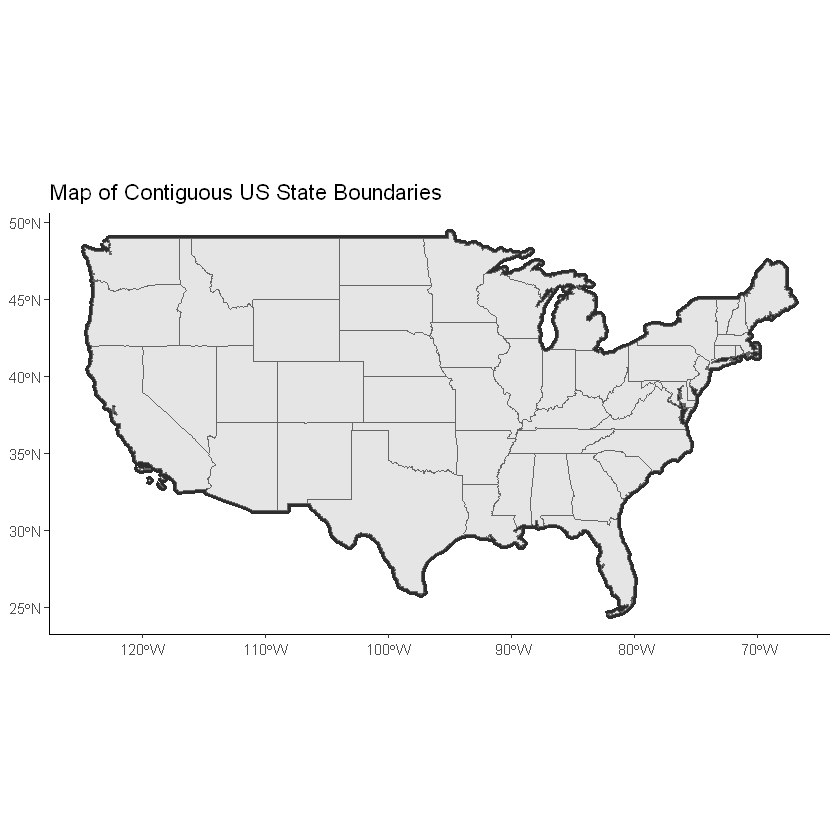

In [72]:
country_boundary_US <- st_read("raw_data/NEON-DS-Site-Layout-Files/US-Boundary-Layers/US-Boundary-Dissolved-States.shp")

ggplot() +
  geom_sf(data = country_boundary_US, color = "gray18", size = 2) +
  geom_sf(data = state_boundary_US, color = "gray40") +
  ggtitle("Map of Contiguous US State Boundaries") +
  coord_sf()+
  theme_classic()

Next, let’s add the location of a flux tower where our study area is. As we are adding these layers, take note of the CRS of each object. First let’s look at the CRS of our tower location object.

<br>
<div class="use_console"></div>

In [73]:
st_crs(point_HARV)

Coordinate Reference System:
  User input: WGS 84 / UTM zone 18N 
  wkt:
PROJCRS["WGS 84 / UTM zone 18N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 18N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-75,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False

Our project string for `DSM_HARV` specifies the UTM projection.

* proj=utm: the projection is UTM, UTM has several zones.
* zone=18: the zone is 18
* datum=WGS84: the datum WGS84 (the datum refers to the 0,0 reference for the coordinate system used in the projection)
* units=m: the units for the coordinates are in METERS.
* ellps=WGS84: the ellipsoid (how the earth’s roundness is calculated) for the data is WGS84

<span class="note"></span> The zone is unique to the UTM projection. Not all CRSs will have a zone.
                                
Let’s check the CRS of our state and country boundary objects.                

<br>
<div class="use_console"></div>

In [74]:
st_crs(country_boundary_US)

Coordinate Reference System:
  User input: WGS 84 
  wkt:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]

In [75]:
st_crs(state_boundary_US)

Coordinate Reference System:
  User input: WGS 84 
  wkt:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]

<div class="Q"><br><br>

What projection does <b>state_boundary_US</b> use?
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What units of measure does <b>country_boundary_US</b> use?
 
<br><br><div class="qhelp"></div></div>

Next, let’s view the extent or spatial coverage for the point_HARV spatial object compared to the state_boundary_US object.

First we’ll look at the extent for our study site.

<br>
<div class="use_console"></div>

In [76]:
st_bbox(point_HARV)

     xmin      ymin      xmax      ymax 
 732183.2 4713265.0  732183.2 4713265.0 

And then the extent for the state boundary data.

<br>
<div class="use_console"></div>

In [77]:
st_bbox(state_boundary_US)

      xmin       ymin       xmax       ymax 
-124.72584   24.49813  -66.94989   49.38436 

<div class="Q"><br><br>

Why are the extents of <b>state_boundary_US</b> smaller than <b>point_HARV</b>?
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What should you be cautious about when reprojecting a raster?  
 
<br><br><div class="qhelp"></div></div>

Previously when working with raster data in different CRSs, we needed to convert all objects to the same CRS. We can do the same thing with our vector data - however, we don’t need to! When using the ggplot2 package, ggplot automatically converts all objects to the same CRS before plotting. This means we can plot our three data sets together without doing any conversion.

<br>
<div class="use_editor"></div>

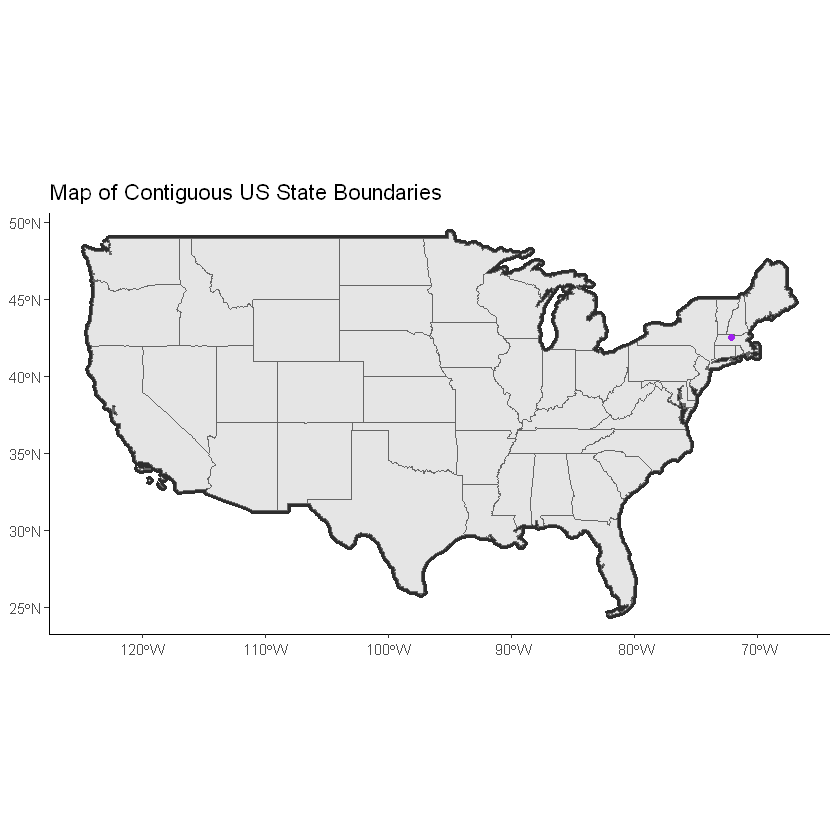

In [78]:
ggplot() +
  geom_sf(data = country_boundary_US, size = 2, color = "gray18") +
  geom_sf(data = state_boundary_US, color = "gray40") +
  geom_sf(data = point_HARV, shape = 19, color = "purple") +
  ggtitle("Map of Contiguous US State Boundaries") +
  coord_sf()+
  theme_classic()

<div class="Q"><br><br>

Do we need to convert all CRS to be the same before plotting with ggplot?  
 
<br><br><div class="qhelp"></div></div>

# Spatial Data in Text Format

The <span class="file">HARV_PlotLocations.csv</span> file contains point locations for study plot where NEON collects data on vegetation and other ecological metrics. We can do the following:

1. Create a map of these plot locations.
1. Export the data in a shapefile format to share with our colleagues. This shapefile can be imported into any GIS software.
1. Create a map showing vegetation height with plot locations layered on top.

Spatial data are sometimes stored in a text file format (.txt or .csv). If the text file has an associated x and y location column, then we can convert it into an sf spatial object. The sf object allows us to store both the x,y values that represent the coordinate location of each point and the associated attribute data - or columns describing each feature in the spatial object.

To begin let’s import a .csv file that contains plot coordinate x, y locations at the NEON Harvard Forest Field Site and look at the structure of that new object.

<br>
<div class="use_editor"></div>

In [79]:
plot_locations_HARV <-
  read.csv("raw_data/NEON-DS-Site-Layout-Files/HARV/HARV_PlotLocations.csv")

str(plot_locations_HARV)

'data.frame':	21 obs. of  16 variables:
 $ easting   : num  731405 731934 731754 731724 732125 ...
 $ northing  : num  4713456 4713415 4713115 4713595 4713846 ...
 $ geodeticDa: chr  "WGS84" "WGS84" "WGS84" "WGS84" ...
 $ utmZone   : chr  "18N" "18N" "18N" "18N" ...
 $ plotID    : chr  "HARV_015" "HARV_033" "HARV_034" "HARV_035" ...
 $ stateProvi: chr  "MA" "MA" "MA" "MA" ...
 $ county    : chr  "Worcester" "Worcester" "Worcester" "Worcester" ...
 $ domainName: chr  "Northeast" "Northeast" "Northeast" "Northeast" ...
 $ domainID  : chr  "D01" "D01" "D01" "D01" ...
 $ siteID    : chr  "HARV" "HARV" "HARV" "HARV" ...
 $ plotType  : chr  "distributed" "tower" "tower" "tower" ...
 $ subtype   : chr  "basePlot" "basePlot" "basePlot" "basePlot" ...
 $ plotSize  : int  1600 1600 1600 1600 1600 1600 1600 1600 1600 1600 ...
 $ elevation : num  332 342 348 334 353 ...
 $ soilTypeOr: chr  "Inceptisols" "Inceptisols" "Inceptisols" "Histosols" ...
 $ plotdim_m : int  40 40 40 40 40 40 40 40 40 40 .

<div class="Q"><br><br>

How many locations (rows) are there in <b>plot_locations_HARV</b>?  
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many attributes are there in <b>plot_locations_HARV</b>?  
 
<br><br><div class="qhelp"></div></div>

all of our character data was imported into R as factor (categorical) data. Next, let’s explore the dataframe to determine whether it contains columns with coordinate values. If we are lucky, our .csv will contain columns labeled:

* “X” and “Y” OR
* Latitude and Longitude OR
* easting and northing (UTM coordinates)

Let’s check out the column names of our dataframe.

<br>
<div class="use_console"></div>

In [80]:
names(plot_locations_HARV)

[1] "easting"    "northing"   "geodeticDa" "utmZone"    "plotID"    
 [6] "stateProvi" "county"     "domainName" "domainID"   "siteID"    
[11] "plotType"   "subtype"    "plotSize"   "elevation"  "soilTypeOr"
[16] "plotdim_m"

Our column names include several fields that might contain spatial information. The `plot_locations_HARV$easting` and `plot_locations_HARV$northing` columns contain coordinate values. We can confirm this by looking at the first six rows of our data.

<br>
<div class="use_console"></div>

In [81]:
head(plot_locations_HARV$easting)

[1] 731405.3 731934.3 731754.3 731724.3 732125.3 731634.3

In [82]:
head(plot_locations_HARV$northing)

[1] 4713456 4713415 4713115 4713595 4713846 4713295

We have coordinate values in our data frame. In order to convert our data frame to an sf object, we also need to know the CRS associated with those coordinate values.

There are several ways to figure out the CRS of spatial data in text format.

1. We can check the file metadata in hopes that the CRS was recorded in the data.
1. We can explore the file itself to see if CRS information is embedded in the file header or somewhere in the data columns.

<br>
<div class="use_console"></div>

In [83]:
head(plot_locations_HARV$geodeticDa)

[1] "WGS84" "WGS84" "WGS84" "WGS84" "WGS84" "WGS84"

In [84]:
head(plot_locations_HARV$utmZone)

[1] "18N" "18N" "18N" "18N" "18N" "18N"

It is not typical to store CRS information in a column. But this particular file contains CRS information this way. The geodeticDa and utmZone columns contain the information that helps us determine the CRS:

* geodeticDa: WGS84 – this is geodetic datum WGS84
* utmZone: 18

To create the `proj4` associated with UTM Zone 18 WGS84 we can look up the projection on the [Spatial Reference](http://www.spatialreference.org/ref/epsg/wgs-84-utm-zone-18n/) website, which contains a list of CRS formats for each projection. From here, we can extract the `proj4` string for UTM Zone 18N WGS84.

However, if we have other data in the UTM Zone 18N projection, it’s much easier to use the `st_crs()` function to extract the CRS in `proj4` format from that object and assign it to our new spatial object. We’ve seen this CRS before with our Harvard Forest study site (`point_HARV`).

<br>
<div class="use_console"></div>

In [85]:
st_crs(point_HARV)

Coordinate Reference System:
  User input: WGS 84 / UTM zone 18N 
  wkt:
PROJCRS["WGS 84 / UTM zone 18N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 18N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-75,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False

<div class="Q"><br><br>

What zone is the <b>point_HARV</b> data in?  
 
<br><br><div class="qhelp"></div></div>

We can use the CRS from that spatial object to convert our non-spatial dataframe into an `sf` object.

Next, let’s create a `crs` object that we can use to define the CRS of our `sf` object when we create it.

<br>
<div class="use_editor"></div>

In [86]:
utm18nCRS <- st_crs(point_HARV)

utm18nCRS

Coordinate Reference System:
  User input: WGS 84 / UTM zone 18N 
  wkt:
PROJCRS["WGS 84 / UTM zone 18N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 18N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-75,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False

<div class="Q"><br><br>

What class of object is <b>utm18nCRS</b>?  
 
<br><br><div class="qhelp"></div></div>

## Convert csv to sf object

To covert our dataframe into an `sf` object, we need to specify:

1. The columns containing X (easting) and Y (northing) coordinate values
1. The CRS that the column coordinate represent (units are included in the CRS) - stored in our utmCRS object.

We will use the `st_as_sf()` function to perform the conversion.

<br>
<div class="use_editor"></div>

In [87]:
plot_locations_sp_HARV <- st_as_sf(plot_locations_HARV, coords = c("easting", "northing"), crs = utm18nCRS)

It's always good practice to double check the CRS to make sure it is correct.

<br>
<div class="use_console"></div>

In [ ]:
st_crs(plot_locations_sp_HARV)

Now that the data is in the right class and order, let's take a look at the data graphically.

<br>
<div class="use_editor"></div>

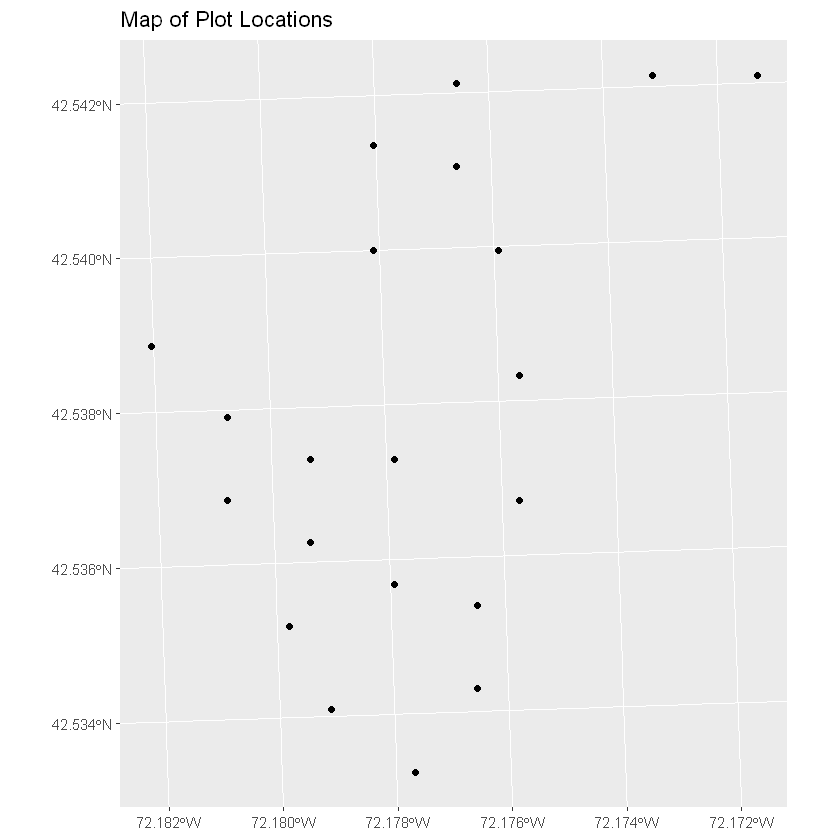

In [88]:
ggplot() +
  geom_sf(data = plot_locations_sp_HARV) +
  ggtitle("Map of Plot Locations")

# Export a Shapefile

We can write an R spatial object to a shapefile using the `st_write` function in `sf`. To do this we need the following arguments:

1. the name of the spatial object (plot_locations_sp_HARV)
1. the directory where we want to save our shapefile (to use current = getwd() or you can specify a different path)
1. the name of the new shapefile (PlotLocations_HARV)
1. the driver which specifies the file format (ESRI Shapefile)

We can now export the spatial object as a shapefile.

<br>
<div class="use_console"></div>

In [89]:
st_write(plot_locations_sp_HARV,
         "raw_data/PlotLocations_HARV.shp", driver = "ESRI Shapefile")

Writing layer `PlotLocations_HARV' to data source `raw_data/PlotLocations_HARV.shp' using driver `ESRI Shapefile'
Writing 21 features with 14 fields and geometry type Point.


<div class="Q"><br><br>

What function converts a dataframe to an sf object?  
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>
    
What parameter should we know about our data before converting into a spatial object?  
 
<br><br><div class="qhelp"></div></div>

# Crop a Raster to Vector Extent

We often work with spatial layers that have different spatial extents. The spatial extent of a shapefile or R spatial object represents the geographic “edge” or location that is the furthest north, south east and west. Thus is represents the overall geographic coverage of the spatial object.

The graphic below illustrates the extent of several of the spatial layers that we have worked with in this lab:

1. Area of interest (AOI) – blue
1. Roads and trails – purple
1. Vegetation plot locations (marked with white dots)– black
1. A canopy height model (CHM) in GeoTIFF format – green

<br>
<img src="rmd-11-compare-data-extents-1.png">
<br>

Frequent use cases of cropping a raster file include reducing file size and creating maps. Sometimes we have a raster file that is much larger than our study area or area of interest. It is often more efficient to crop the raster to the extent of our study area to reduce file sizes as we process our data. Cropping a raster can also be useful when creating pretty maps so that the raster layer matches the extent of the desired vector layers.

## Crop a Raster Using Vector Extent

We can use the `crop()` function to crop a raster to the extent of another spatial object. To do this, we need to specify the raster to be cropped and the spatial object that will be used to crop the raster. R will use the extent of the spatial object as the cropping boundary.

To illustrate this, we will crop the Canopy Height Model (CHM) to only include the area of interest (AOI). Let’s start by plotting the full extent of the CHM data and overlay where the AOI falls within it. The boundaries of the AOI will be colored blue, and we use `fill = NA` to make the area transparent.

<br>
<div class="use_editor"></div>

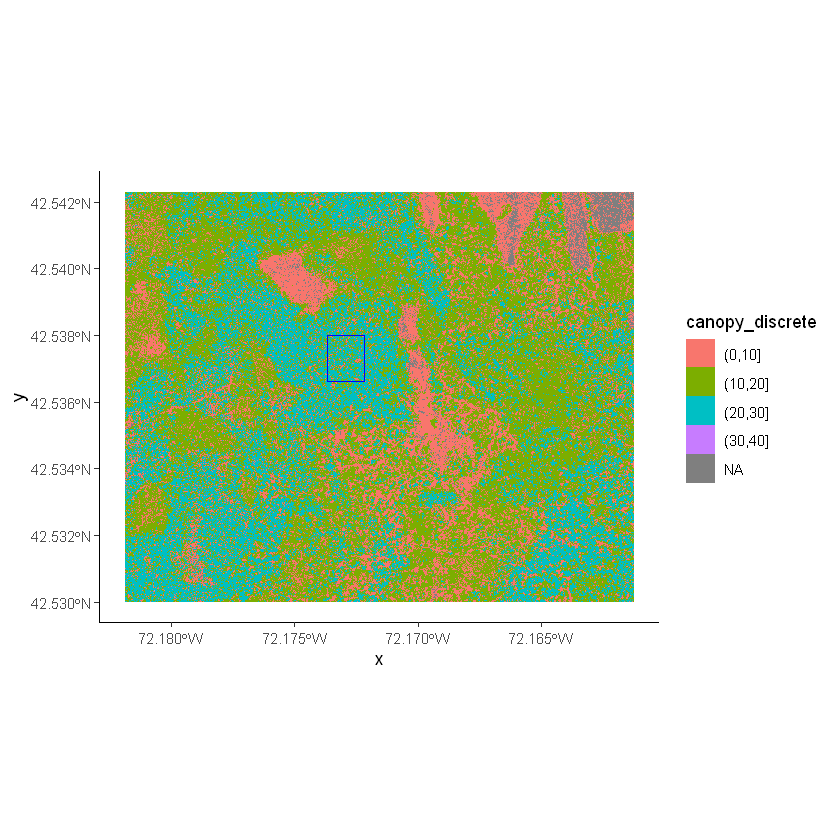

In [93]:
ggplot() +
  geom_raster(data = CHM_HARV_df, aes(x = x, y = y, fill = layer)) + 
  geom_sf(data = aoi_boundary_HARV, color = "blue", fill = NA) +
  coord_sf()+
  theme_classic()

Now that we have visualized the area of the CHM we want to subset, we can perform the cropping operation. We are going to `crop()` function from the raster package to create a new object with only the portion of the CHM data that falls within the boundaries of the AOI.

<br>
<div class="use_editor"></div>

In [103]:
CHM_HARV_Cropped <- crop(x = CHM_HARV, y = aoi_boundary_HARV) 

Now we can plot the cropped CHM data, along with a boundary box showing the full CHM extent. However, remember, since this is raster data, we need to convert to a data frame in order to plot using `ggplot`. To get the boundary box from CHM, the `st_bbox()` will extract the 4 corners of the rectangle that encompass all the features contained in this object.

<br>
<div class="use_editor"></div>

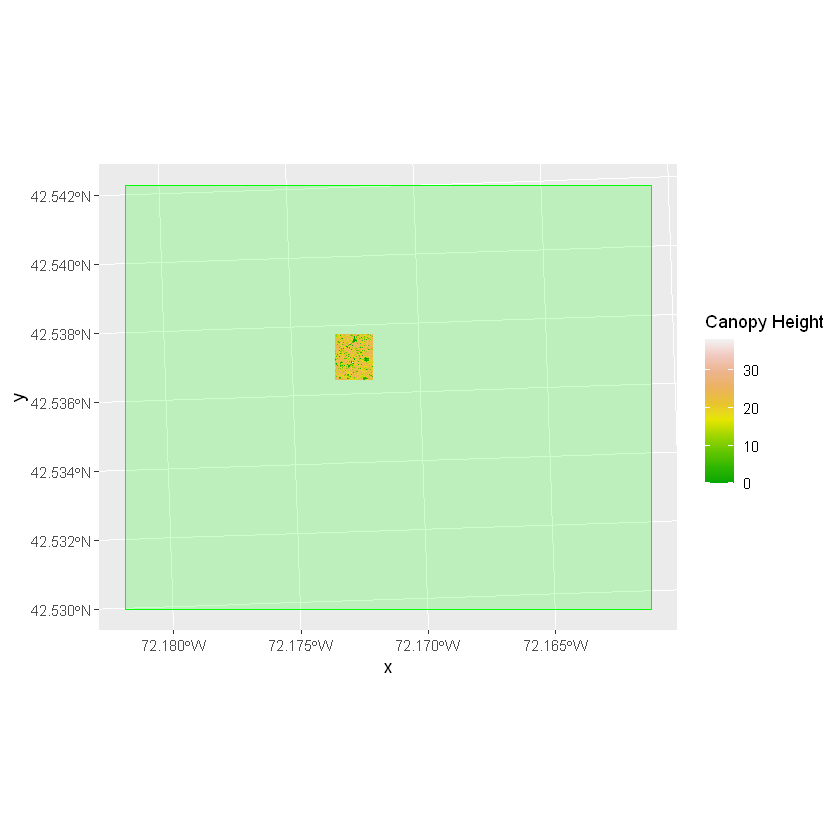

In [106]:
CHM_HARV_Cropped_df <- as.data.frame(CHM_HARV_Cropped, xy = TRUE)

ggplot() +
  geom_sf(data = st_as_sfc(st_bbox(CHM_HARV)), fill = "green",
          color = "green", alpha = .2) +  
  geom_raster(data = CHM_HARV_Cropped_df,
              aes(x = x, y = y, fill = layer)) + 
  scale_fill_gradientn(name = "Canopy Height", colors = terrain.colors(10)) + 
  coord_sf()+
  theme_classic()

The plot above shows that the full CHM extent (plotted in green) is much larger than the resulting cropped raster. Our new cropped CHM now has the same extent as the `aoi_boundary_HARV` object that was used as a crop extent (blue border below).

<br>
<div class="use_editor"></div>

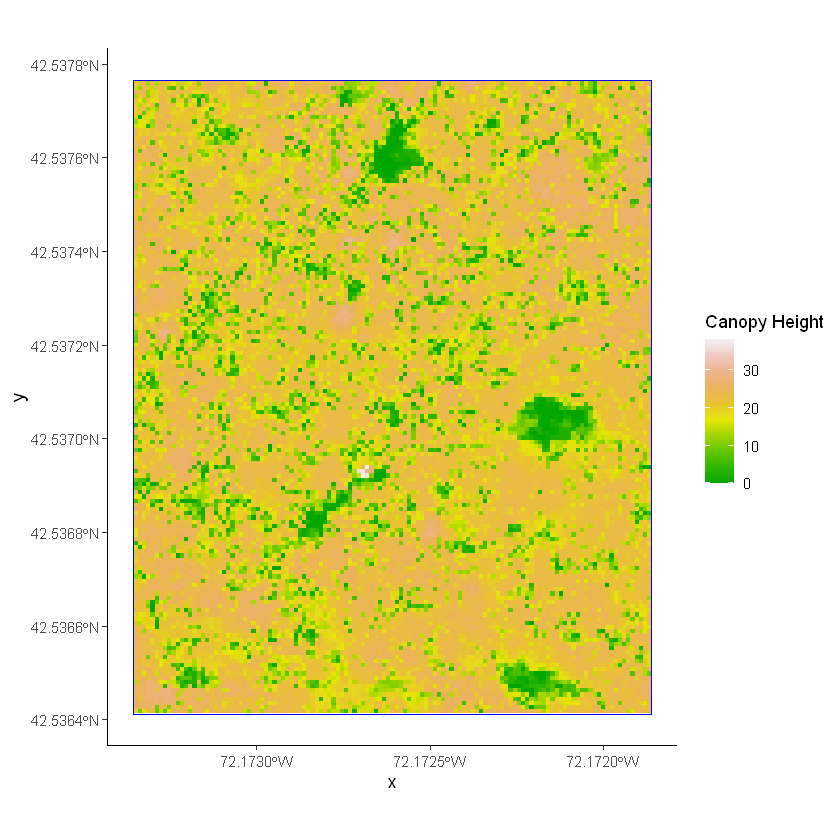

In [110]:
ggplot() +
  geom_raster(data = CHM_HARV_Cropped_df,
              aes(x = x, y = y, fill = layer)) + 
  geom_sf(data = aoi_boundary_HARV, color = "blue", fill = NA) + 
  scale_fill_gradientn(name = "Canopy Height", colors = terrain.colors(10)) + 
  coord_sf()+
  theme_classic()

Let's look at the extents of all the other objects for this site.

<br>
<div class="use_console"></div>

In [111]:
st_bbox(CHM_HARV)

   xmin    ymin    xmax    ymax 
 731453 4712471  733150 4713838 

In [112]:
st_bbox(CHM_HARV_Cropped)

   xmin    ymin    xmax    ymax 
 732128 4713209  732251 4713359 

In [113]:
st_bbox(aoi_boundary_HARV)

     xmin      ymin      xmax      ymax 
 732128.0 4713208.7  732251.1 4713359.2 

In [114]:
st_bbox(plot_locations_sp_HARV)

     xmin      ymin      xmax      ymax 
 731405.3 4712845.0  732275.3 4713846.3 

Our plot location extent is larger than the AOI Boundary. It would be nice to have the vegetation plot locations on top of the Canopy Height Model information. Let's crop the  Canopy Height Model to the extent of the study plot locations then plot the vegetation plot location points on top of the Canopy Height Model.

Let's crop the data.

<br>
<div class="use_editor"></div>

In [117]:
CHM_plots_HARVcrop_df <- crop(x = CHM_HARV, y = plot_locations_sp_HARV)  %>% 
  as.data.frame(xy = TRUE)

head(CHM_plots_HARVcrop_df)

,x,y,layer
,<dbl>,<dbl>,<dbl>
1,731453.5,4713838,19.37000
2,731454.5,4713838,18.67999
3,731455.5,4713838,17.05002
4,731456.5,4713838,17.17999
5,731457.5,4713838,19.73001
6,731458.5,4713838,20.22000


Then plot the data.

<br>
<div class="use_editor"></div>

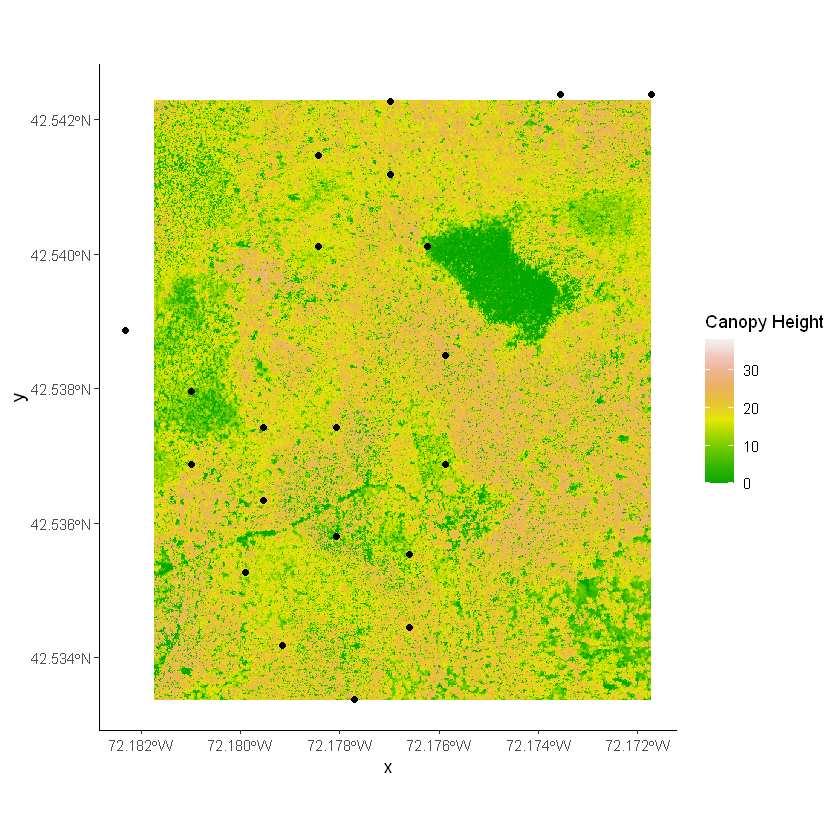

In [119]:
ggplot() + 
  geom_raster(data = CHM_plots_HARVcrop_df, aes(x = x, y = y, fill = layer)) + 
  scale_fill_gradientn(name = "Canopy Height", colors = terrain.colors(10)) + 
  geom_sf(data = plot_locations_sp_HARV) + 
  coord_sf()+
  theme_classic()

# Define an Extent

So far, we have used a shapefile to crop the extent of a raster dataset. Alternatively, we can also use the `extent()` function to define an extent to be used as a cropping boundary. This creates a new object of class extent. Here we will provide the `extent()` function our xmin, xmax, ymin, and ymax (in that order).

<br>
<div class="use_editor"></div>

In [122]:
new_extent <- extent(732161.2, 732238.7, 4713249, 4713333)

[1] "Extent"
attr(,"package")
[1] "raster"

Once we have defined our new extent, we can use the `crop()` function to crop our raster to this extent object then convert it to a dataframe.

<br>
<div class="use_editor"></div>

In [123]:
CHM_HARV_manual_cropped <- crop(x = CHM_HARV, y = new_extent)

CHM_HARV_manual_cropped_df <- as.data.frame(CHM_HARV_manual_cropped, xy = TRUE)

Now we can plot the data.

<br>
<div class="use_editor"></div>

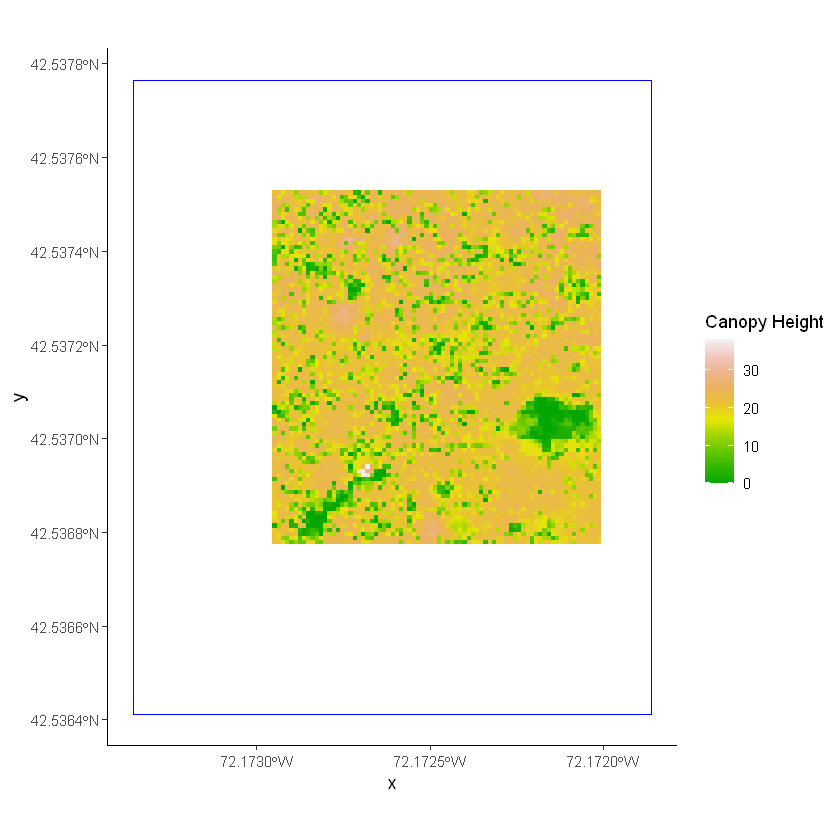

In [124]:
ggplot() + 
  geom_sf(data = aoi_boundary_HARV, color = "blue", fill = NA) +
  geom_raster(data = CHM_HARV_manual_cropped_df,
              aes(x = x, y = y, fill = layer)) + 
  scale_fill_gradientn(name = "Canopy Height", colors = terrain.colors(10)) + 
  coord_sf()+
  theme_classic()

# Extract Raster Pixels Values Using Vector Polygons

Often we want to extract values from a raster layer for particular locations - for example, plot locations that we are sampling on the ground. We can extract all pixel values within 20m of our x,y point of interest. These can then be summarized into some value of interest (e.g. mean, maximum, total).

The `extract()` function can do this and requires:

1. The raster that we wish to extract values from,
1. The vector layer containing the polygons that we wish to use as a boundary or boundaries,

We will begin by extracting all canopy height pixel values located within our `aoi_boundary_HARV` polygon which surrounds the tower located at the NEON Harvard Forest field site.

<br>
<div class="use_editor"></div>

In [125]:
tree_height <- extract(x = CHM_HARV, y = aoi_boundary_HARV, df = TRUE)

str(tree_height)

'data.frame':	18450 obs. of  2 variables:
 $ ID   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ layer: num  19.9 22.1 23.8 12.6 23.9 ...


When we use the `extract()` function, R extracts the value for each pixel located within the boundary of the polygon being used to perform the extraction - in this case the `aoi_boundary_HARV` object (a single polygon). Here, the function extracted values from **18,450 pixels**.

We can create a histogram of tree height values within the boundary to better understand the structure or height distribution of trees at our site. We will use the column layer from our data frame as our x values, as this column represents the tree heights for each pixel.

<br>
<div class="use_editor"></div>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



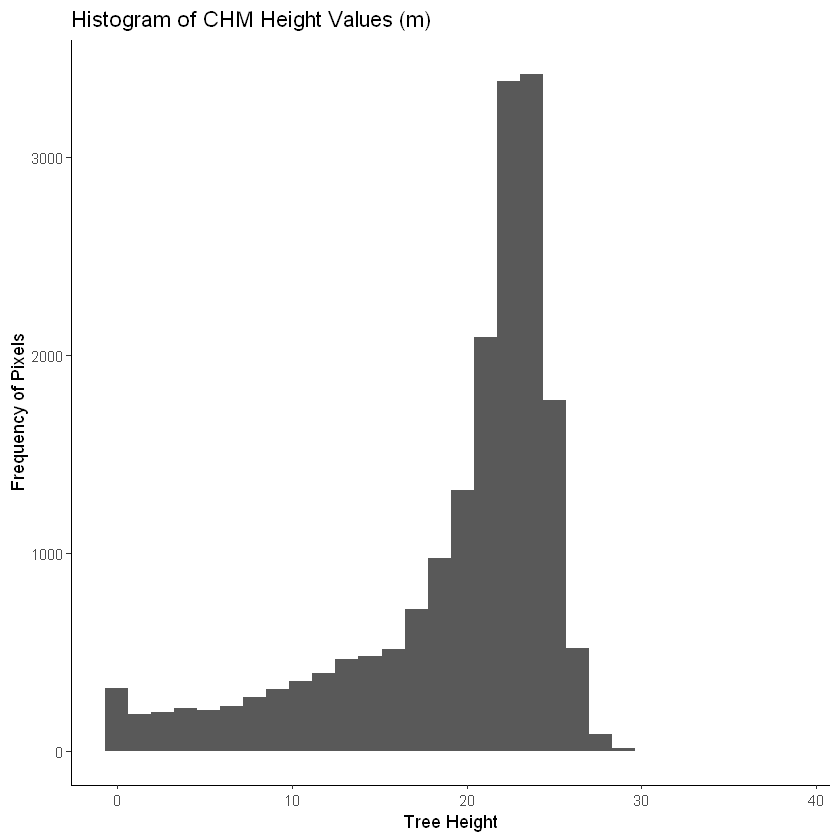

In [128]:
ggplot() + 
  geom_histogram(data = tree_height, aes(x = layer)) +
  ggtitle("Histogram of CHM Height Values (m)") +
  xlab("Tree Height") + 
  ylab("Frequency of Pixels")+
  theme_classic()

The `summary()` function can be helpful for viewing descriptive statistics including min, max, and mean height values. These values help us better understand vegetation at our field site.

<br>
<div class="use_console"></div>

In [130]:
summary(tree_height$layer)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   17.33   21.70   19.34   23.45   38.17 

## Summarize Extracted Raster Values

We often want to extract summary values from a raster. We can tell R the type of summary statistic we are interested in using the fun = argument. Let’s extract a mean height value for our AOI. Because we are extracting only a single number, we will not use the `df = TRUE` argument.

<br>
<div class="use_editor"></div>

In [131]:
mean_tree_height_AOI <- extract(x = CHM_HARV, y = aoi_boundary_HARV, fun = mean)

mean_tree_height_AOI

19.34446


<div class="Q"><br><br>
    
What is the the mean height value, extracted from our LiDAR data derived canopy height model (<b>mean_tree_height_AOI</b>)?  
 
<br><br><div class="qhelp"></div></div>

# Extract Data using x,y Locations

We can also extract pixel values from a raster by defining a buffer or area surrounding individual point locations using the extract() function. To do this we define the summary argument (fun = mean) and the buffer distance (buffer = 20) which represents the radius of a circular region around each point. By default, the units of the buffer are the same units as the data’s CRS. All pixels that are touched by the buffer region are included in the extract.

Let’s put this into practice by figuring out the mean tree height within a radius of 20m around the tower location (`point_HARV`). Because we are extracting only a single number, we will not use the `df = TRUE` argument.

<br>
<div class="use_editor"></div>

In [132]:
mean_tree_height_tower <- extract(x = CHM_HARV,
                                  y = point_HARV,
                                  buffer = 20,
                                  fun = mean)

mean_tree_height_tower

[1] 17.91755

<div class="Q"><br><br>
    
What is the median tree height within a radius of 20 m around the tower location (point_HARV)?
    
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>
    
What does the <b>crop()</b> function do?
    
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>
    
What function extracts pixels from a raster object that fall within a particular extent boundary?
    
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>
    
What function defines an extent?
    
<br><br><div class="qhelp"></div></div>

<div class="big_title">This is the end of lab</div>

*******************
*******************

Code below is for formatting of this lab. Do not alter!

In [ ]:
<span class="important"></span>

<img src="imdbtitle.png">

In [6]:
cssFile <- '../css/custom.css'
IRdisplay::display_html(readChar(cssFile, file.info(cssFile)$size))

IRdisplay::display_html("<style>.Q::before {counter-increment: question_num;
    content: 'QUESTION ' counter(question_num) ': '; white-space: pre; }.T::before {counter-increment: task_num;
    content: 'Task ' counter(task_num) ': ';</style>")